# Catchment Area 2019 Slides

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mp
import seaborn as sns
import matplotlib.pyplot as plt
import math

%config InlineBackend.figure_format = 'retina'

In [2]:
#2019 slides
CA_2019 = pd.read_csv('CA_2019slides.csv')

CA_2019.tail()

,OBJECTID,SHAPE_Leng,SHAPE_Area,Notes,CLASSIFICA,survey_id,id,X,Y,slope_mean,diff_min,diff_max,diff_mea_1,vol_diff,DI_sum,DI_mean,DI_max,DI_range
87,22,18.168295,18.030990,NaN,2b,NaN,NaN,NaN,NaN,26.601302,-0.544744,0.177382,-0.238672,-4.300,2395.247192,140.896894,241.814468,159.918694
88,25,11.294824,8.485526,NaN,2b,NaN,NaN,NaN,NaN,24.164138,-0.431343,0.183758,-0.154279,-1.300,724.306221,80.478469,112.489471,49.966568
89,23,11.235952,7.045919,NaN,2a,NaN,NaN,NaN,NaN,30.181413,-0.349724,0.151829,-0.093353,-0.650,865.046288,123.578041,197.808212,111.482643
90,24,6.499819,2.495489,NaN,2a,NaN,NaN,NaN,NaN,34.500089,-0.217543,0.172138,0.070605,0.176,800.717056,200.179264,223.906494,54.099182
91,7,25.976477,24.126880,NaN,2a,NaN,NaN,NaN,NaN,28.367424,-0.421892,0.179199,-0.087788,-2.110,7689.432503,307.577300,854.575867,780.006401


In [3]:
#2017 slides
CA_2017 = pd.read_csv('CA_2017slides.csv')

CA_2017.head()

,area,perimeter,id,survey_id,diff17_19_,diff17_1_1,diff17_1_2,vol_diff,15-19_mean,vol_15-17,DI_sum,DI_mean,DI_max,DI_range,slope_mean
0,8.494629,12.379746,203,NaN,0.103984,-0.095959,0.238665,0.883,0.092,0.7858,44445.174229,1269.862121,4428.590820,4424.688177,18.154278
1,18.382812,18.019792,204,NaN,0.135134,-0.026718,0.245579,2.484,0.169,3.1177,23147.394344,312.802626,1459.248901,1399.424076,25.654776
2,25.349121,21.257350,205,NaN,0.161985,0.032009,0.277132,4.106,0.269,6.8189,9635.707649,92.651035,192.180542,156.740631,26.549733
3,21.087402,19.287146,206,NaN,0.130621,-0.007530,0.261532,2.754,0.094,1.9885,4236.653111,49.263408,166.538925,158.546028,27.132617
4,12.258789,13.552259,207,NaN,0.137865,0.048594,0.217394,1.690,0.033,0.4156,1844.890280,37.650822,91.308006,78.316047,27.590677


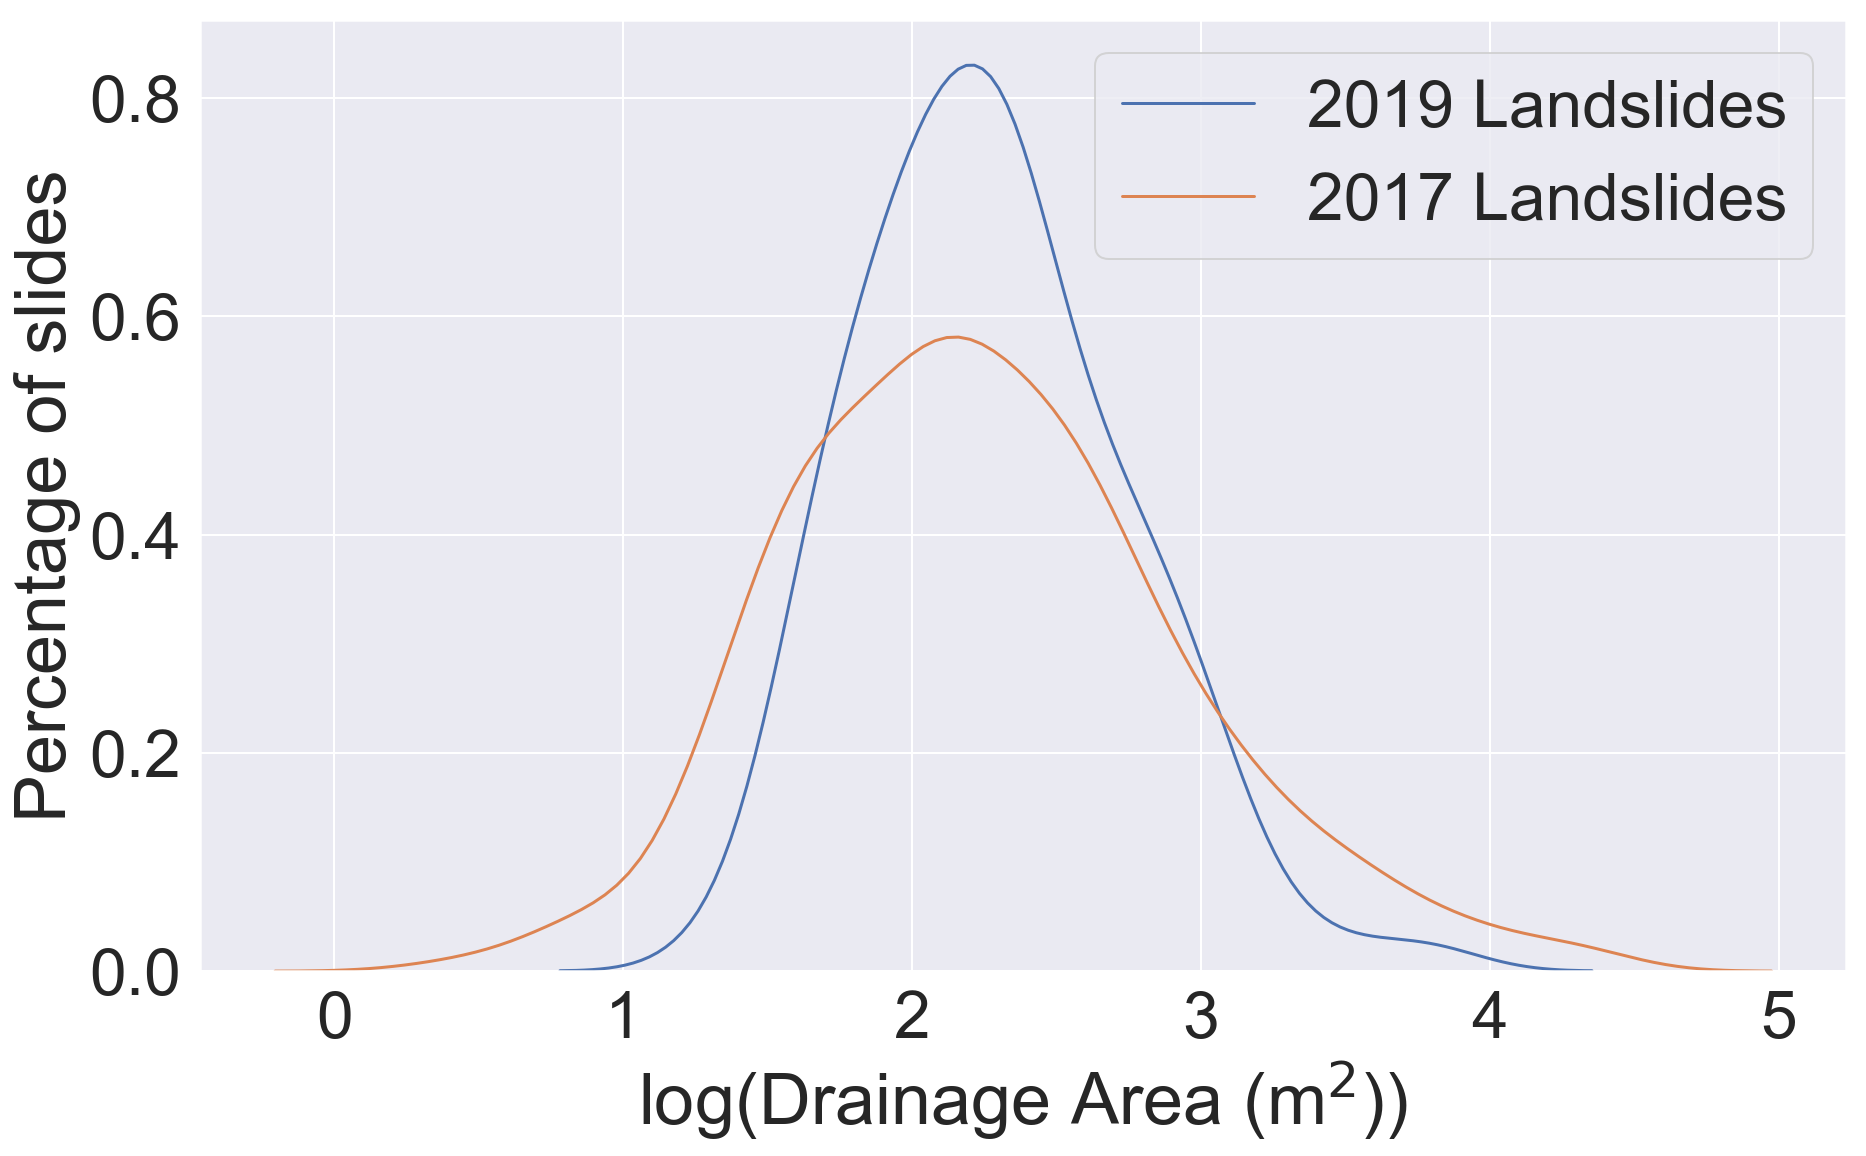

In [4]:
#set CA data

sns.set(color_codes=True)
sns.set(font_scale=3)  
CAdata2019 = np.log10(CA_2019['DI_max'])
CAdata2017 = np.log10(CA_2017['DI_max'])

#initiate plot
fig, ax = plt.subplots()


CA_bins = [0,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0]

ax = sns.distplot(CAdata2019,hist=False, bins=CA_bins, norm_hist=True, label='2019 Landslides')
ax = sns.distplot(CAdata2017,hist=False, bins=CA_bins, norm_hist=True, label='2017 Landslides')


plt.xlabel('log(Drainage Area (m$^2$))')
plt.ylabel('Percentage of slides')
plt.legend()

fig = plt.gcf()
fig.set_size_inches(14.75, 8.75)
#save figure
fig.savefig('figures/drainage_areaplot.pdf', bbox_inches='tight')

In [5]:
CA_2017_RH = pd.read_csv('CA_2017slides_RH.csv')
CA_2019_RH = pd.read_csv('CA_2019slides_RH.csv')
CA_2019_GU = pd.read_csv('CA_2019slides_geounit.csv')
CA_2017_GU = pd.read_csv('CA_2017slides_geounit.csv')

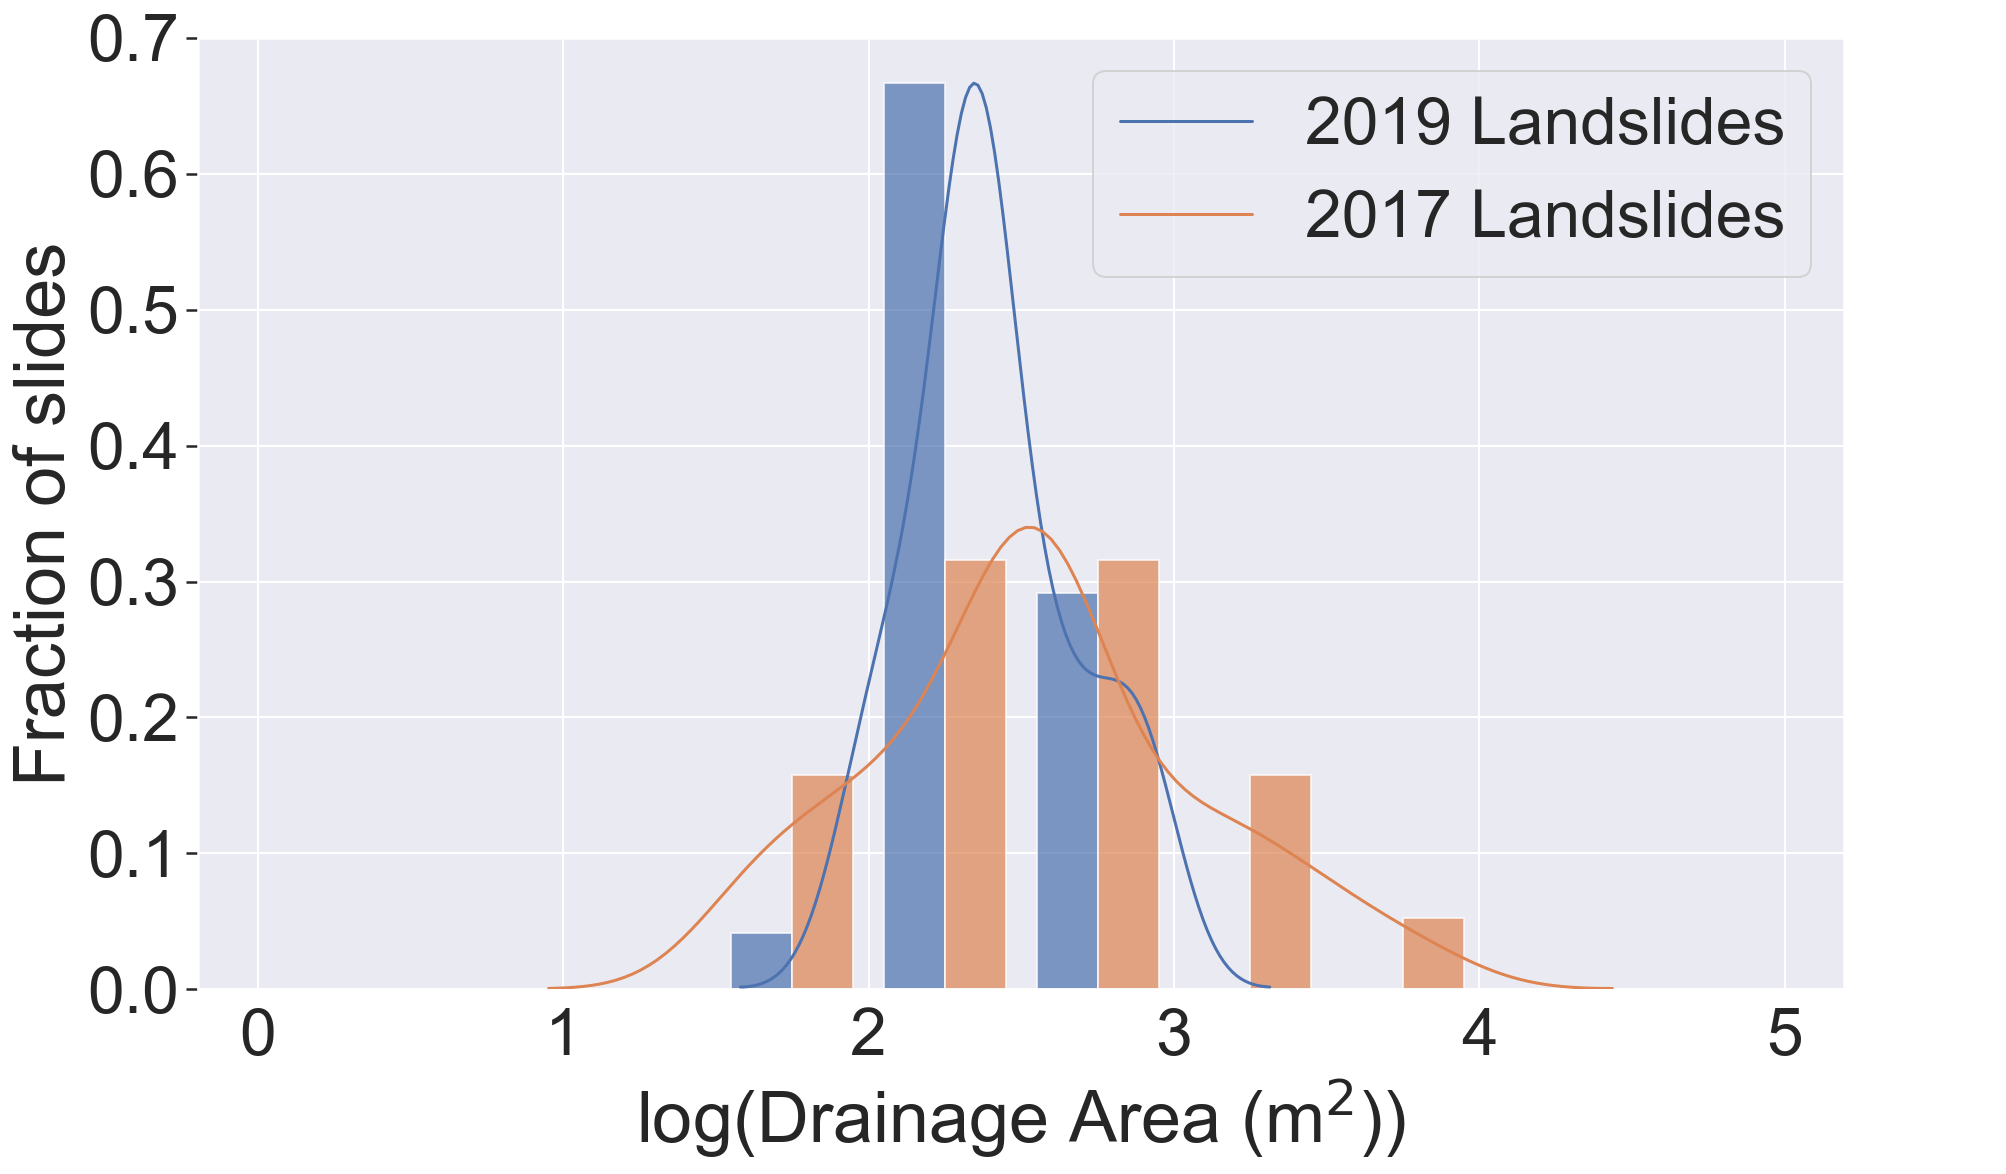

In [6]:
#set CA data

sns.set(color_codes=True)
sns.set(font_scale=3)  
RH_CAdata2019 = np.log10(CA_2019_RH['DI_max'])
RH_CAdata2017 = np.log10(CA_2017_RH['DI_max'])

#initiate plot
fig = plt.figure()
ax = fig.add_subplot(111)
ax1 = ax.twinx()
ax1.grid(None)
ax1.axis('off')


weightsCA2019 = np.ones_like(RH_CAdata2019) / len(RH_CAdata2019)
weightsCA2017 = np.ones_like(RH_CAdata2017) / len(RH_CAdata2017)

ax.hist([RH_CAdata2019,RH_CAdata2017], bins=CA_bins, weights=[weightsCA2019,weightsCA2017], alpha=0.7, label=['2019 Landslides','2017 Landslides'],edgecolor='white', linewidth=1)
ax1 = sns.distplot(RH_CAdata2019,hist=False, bins=CA_bins, norm_hist=True, label='2019 Landslides')
ax1 = sns.distplot(RH_CAdata2017,hist=False, bins=CA_bins, norm_hist=True, label='2017 Landslides')

ax.set_xlabel('log(Drainage Area (m$^2$))')
ax.set_ylabel('Fraction of slides')
plt.legend()

fig = plt.gcf()
fig.set_size_inches(14.75, 8.75)
#save figure
fig.savefig('figures/RH_drainage_areaplot.pdf', bbox_inches='tight')

In [7]:
CA_bins = [0,100,200,300,400,500,600,700,800,900,1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000]

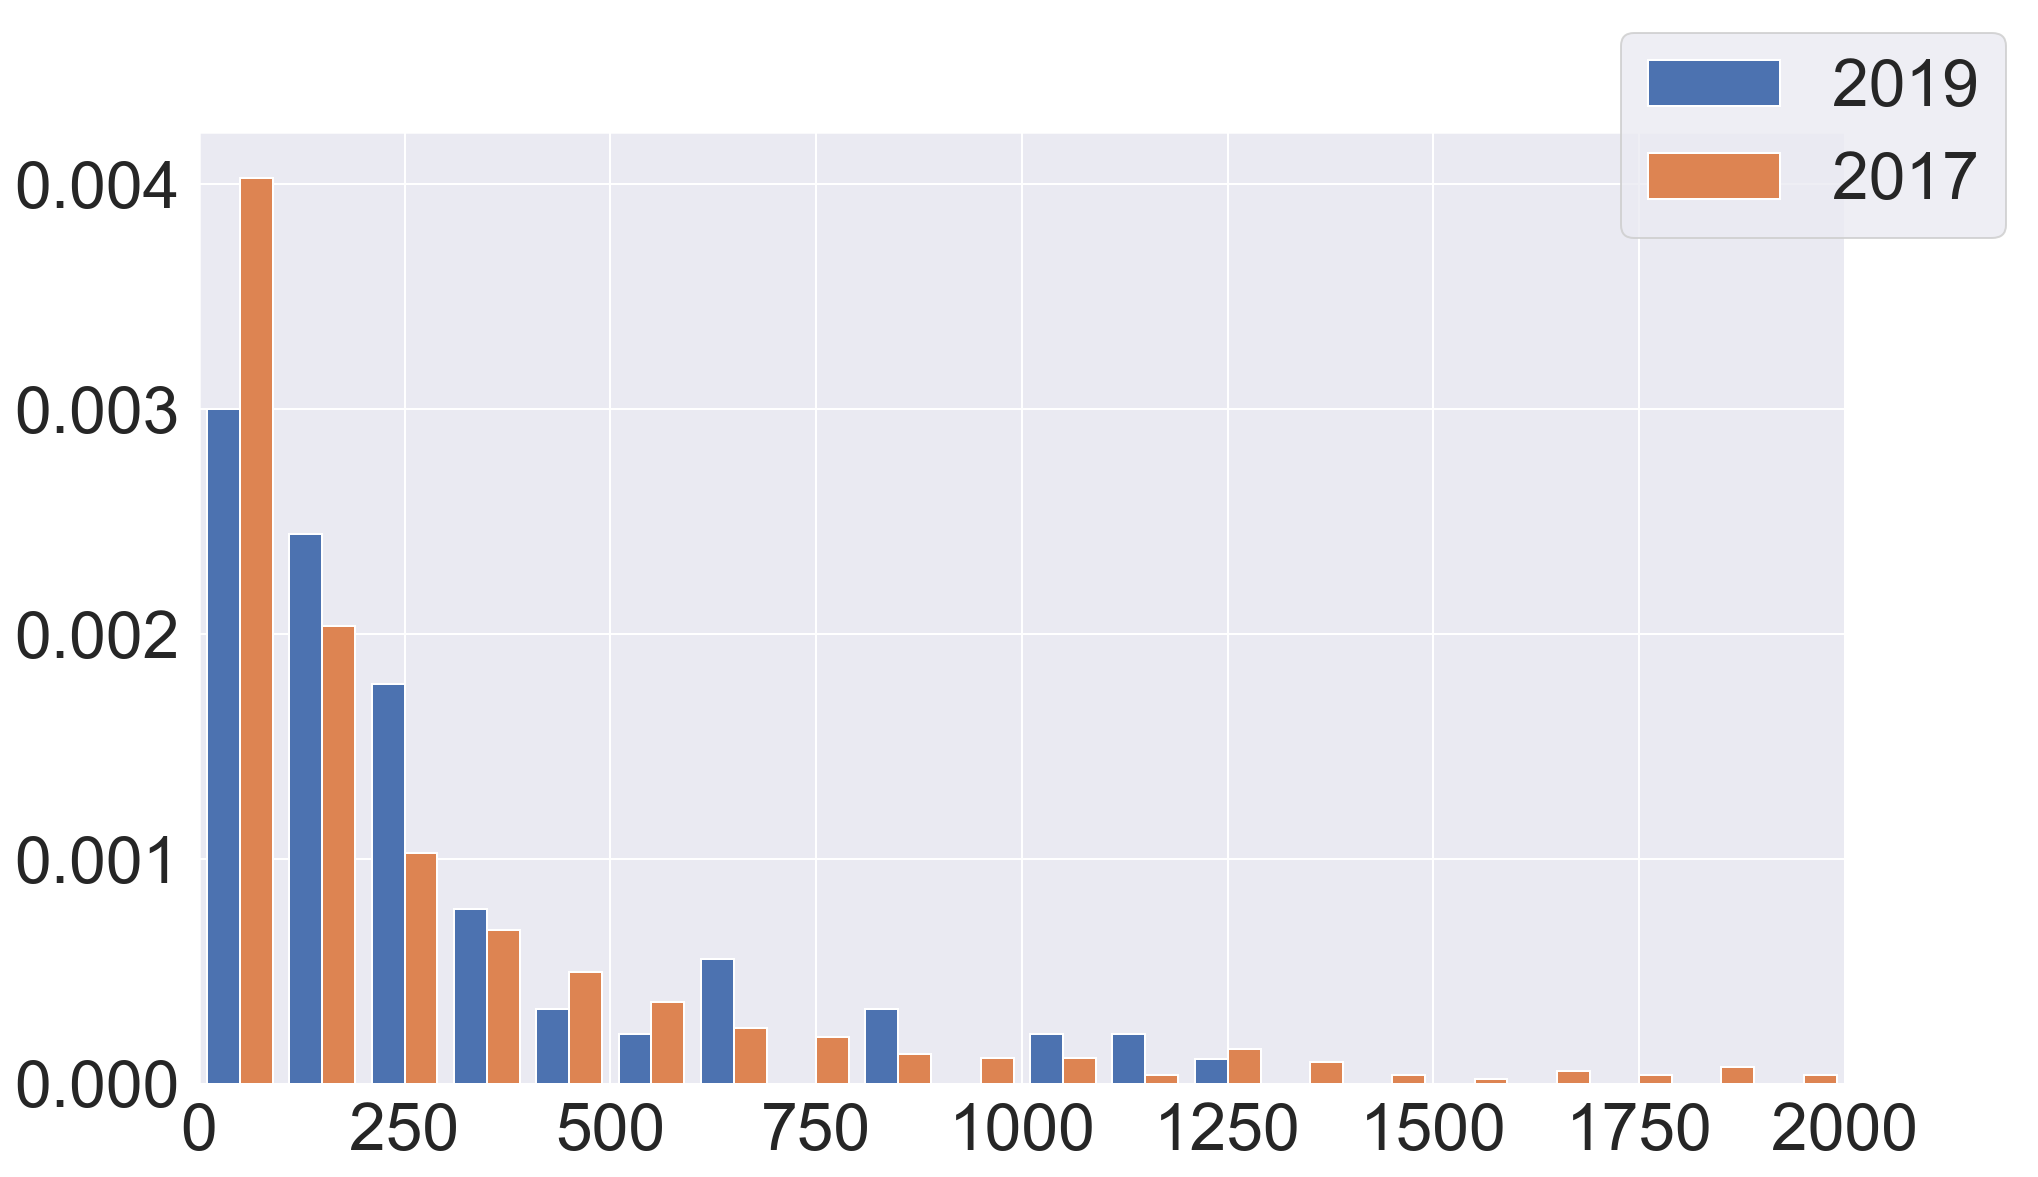

In [8]:
fig, ax = plt.subplots()

ax.hist( [CA_2019.DI_max,CA_2017.DI_max], density=True, bins=CA_bins, label=['2019','2017'], edgecolor='white')
ax.set_xlim(0,2000)
#ax.xticks(CA_bins, rotation=45)

fig.legend()

fig = plt.gcf()
fig.set_size_inches(14.75, 8.75)
#fig4.savefig('figures/yr_rainfall_comparison.pdf', bbox_inches='tight')

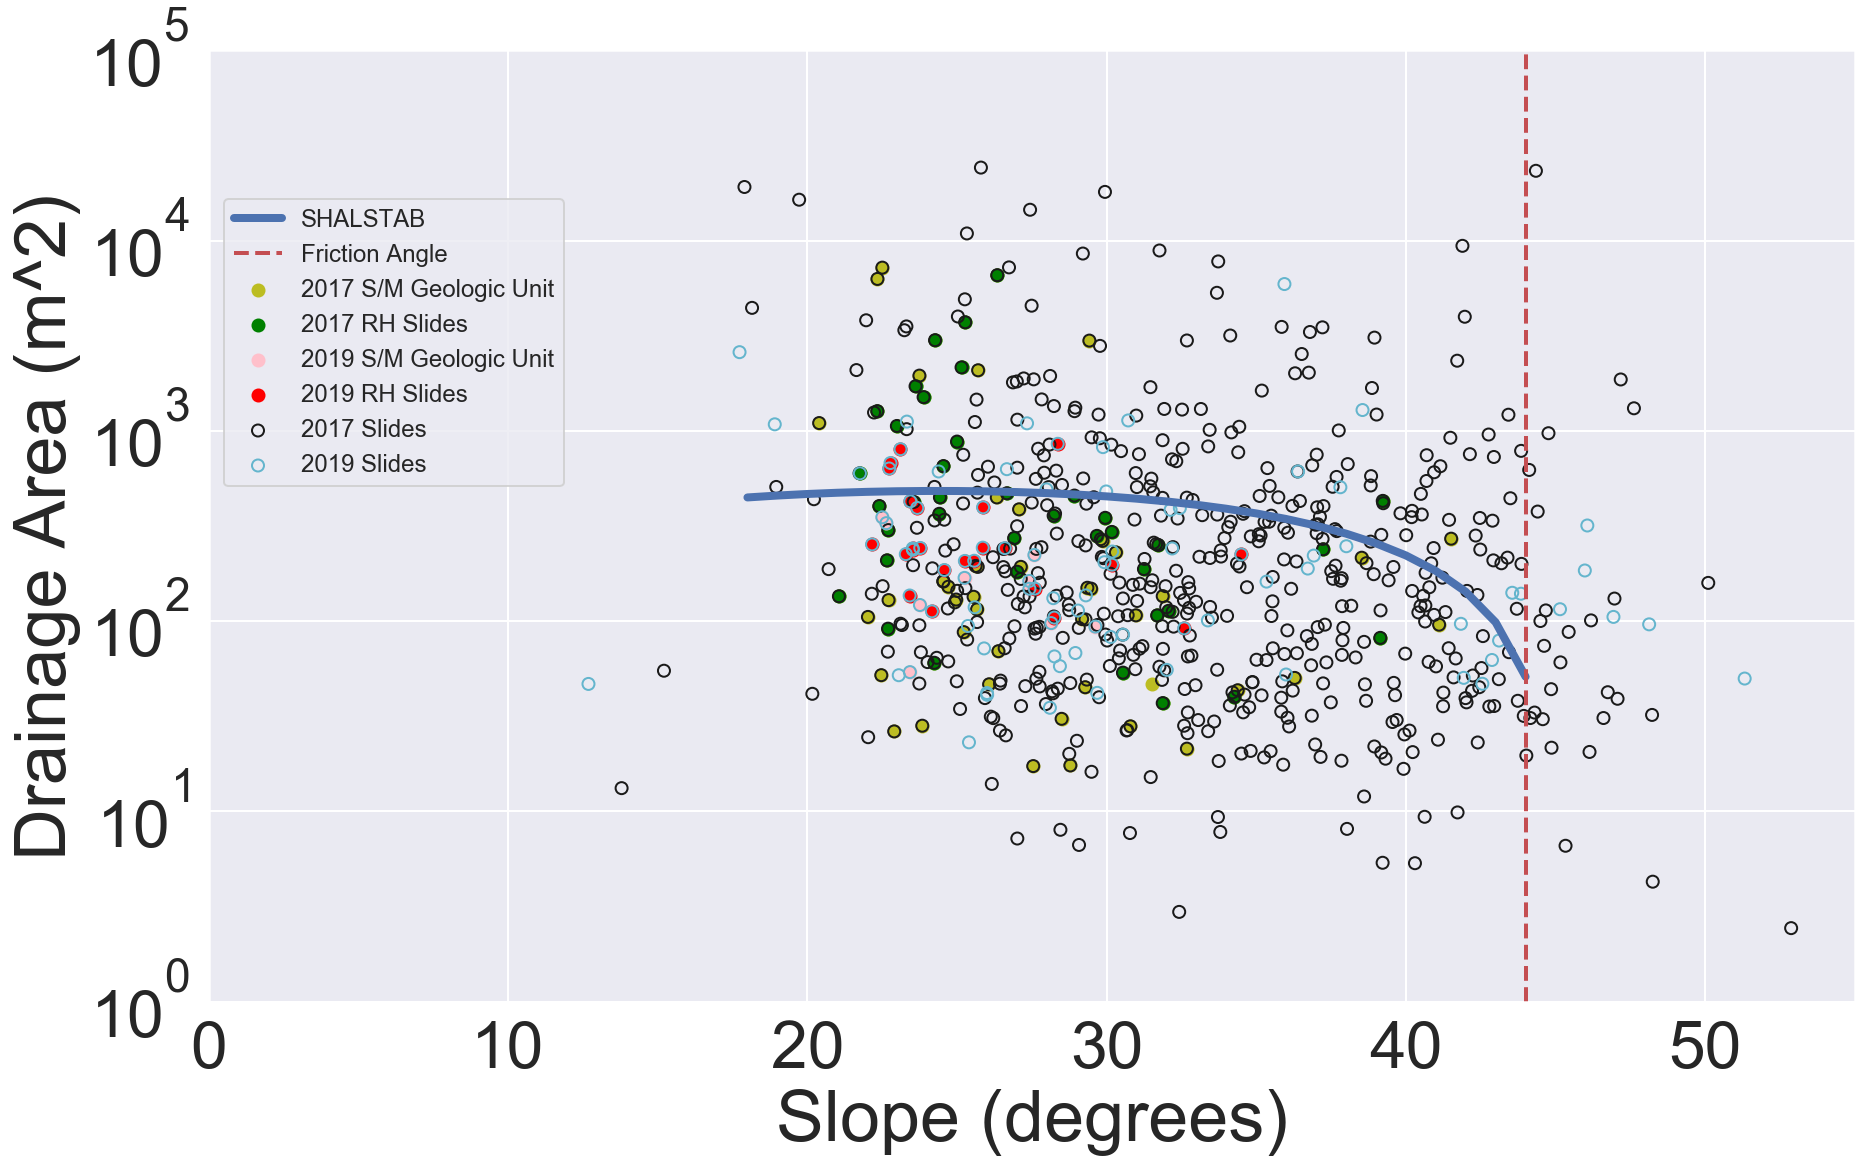

In [14]:
fig,ax = plt.subplots(1,1,figsize=(8,4), sharey=True)

ax = plt.scatter(CA_2017_GU['slope_mean'], CA_2017_GU['DI_max'], color='tab:olive', label='2017 S/M Geologic Unit')
ax = plt.scatter(CA_2017_RH['slope_mean'], CA_2017_RH['DI_max'], color='green', label='2017 RH Slides')

ax = plt.scatter(CA_2019_GU['slope_mean'], CA_2019_GU['DI_max'], color='pink', label='2019 S/M Geologic Unit')
ax = plt.scatter(CA_2019_RH['slope_mean'], CA_2019_RH['DI_max'], color='red', label='2019 RH Slides')

ax = plt.scatter(CA_2017['slope_mean'], CA_2017['DI_max'], facecolors='none', edgecolors='k', label='2017 Slides')
ax = plt.scatter(CA_2019['slope_mean'], CA_2019['DI_max'], facecolors='none', edgecolors='c', label='2019 Slides')

plt.ylabel('Drainage Area (m^2)')
plt.xlabel('Slope (degrees)')

plt.yscale('log')
plt.axis([0, 55, 1, 100000])

def graph(formula, x_range):  
    x = np.array(x_range)  
    y = formula(x)  # <- note now we're calling the function 'formula' with x
    plt.plot(x, y, linewidth=4,label='SHALSTAB')
    

def my_formula(x):
    return 1.7 * (1 - np.tan(np.radians( x ))/(np.tan(np.radians(45)))) * 1259 * np.sin(np.radians( x ))

graph(my_formula, range(18, 45))
plt.axvline(44, ymin=0, ymax=1, linestyle='--', color='r', linewidth=2, label = 'Friction Angle') #plots line at peak

fig.legend(bbox_to_anchor=(0.1, 0.78), loc='upper left', fontsize=12)

fig = plt.gcf()
fig.set_size_inches(14.75, 8.75)
#fig4.savefig('figures/yr_rainfall_comparison.pdf', bbox_inches='tight')

#### drainage area statistics

In [16]:
mean_log_CA2019 = np.mean(CAdata2019)
mean_log_CA2017 = np.mean(CAdata2017)

median_log_CA2019 = np.median(CAdata2019)
median_log_CA2017 = np.median(CAdata2017)

stdev_log_CA2019 = np.std(CAdata2019)
stdev_log_CA2017 = np.std(CAdata2017)

print("Log transformed mean of 2019 drainage areas:", 10**mean_log_CA2019)
print("Log transformed mean of 2017 drainage areas:", 10**mean_log_CA2017)

print("Log transformed median of 2019 drainage areas:", 10**median_log_CA2019)
print("Log transformed median of 2017 drainage areas:", 10**median_log_CA2017)

print("Log transformed stdev of 2019 drainage areas:", 10**stdev_log_CA2019)
print("Log transformed stdev of 2017 drainage areas:", 10**stdev_log_CA2017)

Log transformed mean of 2019 drainage areas: 190.06691391873
Log transformed mean of 2017 drainage areas: 177.01890622753788
Log transformed median of 2019 drainage areas: 184.99728660695655
Log transformed median of 2017 drainage areas: 155.01095581054696
Log transformed stdev of 2019 drainage areas: 2.818963904919177
Log transformed stdev of 2017 drainage areas: 4.7747938903494616
